_‰ª•‰∏ã‰ª£Á¢ºÊòØÂú® Sagemaker ‰∏≠ÈÅãË°åÔºåÊâÄ‰ª•Ë¶ÅÂÖà‰∏äÂÇ≥ËÖ≥Êú¨_

# ÂÆâË£ùÂ•ó‰ª∂

In [1]:
%%capture
!python -m pip install --upgrade pip boto3 scikit-learn sagemaker nltk seaborn

# È≠îÊ≥ïÊñπÊ≥ï

%%capture Èö±ËóèËº∏Âá∫

# Âø´ÈÄüÈçµ

DD Âà™Èô§Áï∂Ââç Cell

A Âú®Áï∂Ââç Cell ‰∏äÊñπÊ∑ªÂä† Cell

B Âú®Áï∂Ââç Cell ‰∏ãÊñπÊ∑ªÂä† Cell

C Ë§áË£ΩÁï∂Ââç Cell

V Ë≤º‰∏äË§áË£ΩÁöÑ Cell

M Â∞áÁï∂Ââç Cell ËΩâÊèõÁÇ∫ Markdown

Y Â∞áÁï∂Ââç Cell ËΩâÊèõÁÇ∫ Python Code Cell

# Êü•Ë©¢Â∏≥Ëôü

ÈÄôÂÉÖÂÉÖÊòØÂÄãÁøíÊÖ£ÔºåÁî®‰ª•Á¢∫Ë™çÁï∂Ââç‰ΩøÁî®ÁöÑÂ∏≥Ëôü

In [2]:
import boto3

# ÂàùÂßãÂåñ STS ÂÆ¢Êà∂Á´Ø
sts_client = boto3.client('sts')

# ÂèñÂæóÁï∂ÂâçÂ∏≥Êà∂ÁöÑ Account ID
account_id = sts_client.get_caller_identity()["Account"]
print("Áï∂ÂâçÁöÑ Account ID:", account_id)

Áï∂ÂâçÁöÑ Account ID: 211125745218


# Â∞éÂÖ•Â∫´

Âú® .ipynb ËÖ≥Êú¨‰∏≠ÔºåÂèØ‰æùÊìöÂçÄÊÆµÈúÄÊ±ÇÂ∞éÂÖ•Â∫´

In [3]:
import boto3
import os, io, struct
import numpy as np
import pandas as pd
from sklearn.metrics import (
    roc_auc_score, roc_curve, auc, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re
import nltk

Matplotlib is building the font cache; this may take a moment.


# ‰∏ãËºâ NLTK Ë≥áÊñôÈõÜ

NLTK ÊúÉÊ™¢Êü•ÈÄô‰∫õË∑ØÂæëÊòØÂê¶Â≠òÂú®ÊåáÂÆöÁöÑË≥áÊ∫ê

In [4]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...


True

# Ëá™Ë®ÇËºîÂä©ÂáΩÊï∏

Áπ™Ë£ΩÊ∑∑Ê∑ÜÁü©Èô£

In [5]:
def plot_confusion_matrix(test_labels, target_predicted):
    matrix = confusion_matrix(test_labels, target_predicted)
    df_confusion = pd.DataFrame(matrix)
    colormap = sns.color_palette("BrBG", 10)
    sns.heatmap(df_confusion, annot=True, fmt='.2f', cbar=None, cmap=colormap)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.show()

Ëº∏Âá∫Á∏æÊïàÊåáÊ®ôÔºåË©ï‰º∞Ê®°ÂûãÁöÑÂàÜÈ°ûÊïàÊûúÔºå‰∏¶Ë®àÁÆóÂêÑÁ®ÆÂàÜÈ°ûÊåáÊ®ô

In [6]:
def print_metrics(test_labels, target_predicted_binary):
    # Ë™øÁî® sklearn ÁöÑÂáΩÊï∏
    TN, FP, FN, TP = confusion_matrix(test_labels, target_predicted_binary).ravel()
    '''‰æùÊìöÊ∑∑Ê∑ÜÁü©Èô£ÂõõÂÄãÂêëÈáèÁöÑÂÄºÈÄ≤Ë°å‰ª•‰∏ãÈÅãÁÆó'''
    # Sensitivity, hit rate, recall, or true positive rate
    Sensitivity  = float(TP)/(TP+FN)*100
    # Specificity or true negative rate
    Specificity  = float(TN)/(TN+FP)*100
    # Precision or positive predictive value
    Precision = float(TP)/(TP+FP)*100
    # Negative predictive value
    NPV = float(TN)/(TN+FN)*100
    # Fall out or false positive rate
    FPR = float(FP)/(FP+TN)*100
    # False negative rate
    FNR = float(FN)/(TP+FN)*100
    # False discovery rate
    FDR = float(FP)/(TP+FP)*100
    # Overall accuracy
    ACC = float(TP+TN)/(TP+FP+FN+TN)*100

    '''
    # ÂÆòÊñπÂéüÂßã‰ª£Á¢º
    print(f"Sensitivity or TPR: {Sensitivity}%")    
    print(f"Specificity or TNR: {Specificity}%") 
    print(f"Precision: {Precision}%")   
    print(f"Negative Predictive Value: {NPV}%")  
    print( f"False Positive Rate: {FPR}%") 
    print(f"False Negative Rate: {FNR}%")  
    print(f"False Discovery Rate: {FDR}%" )
    print(f"Accuracy: {ACC}%") 
    '''
    # ‰æøÊñºÈñ±ËÆÄ
    print(f"ÊïèÊÑüÊÄß/Âè¨ÂõûÁéá (Sensitivity or TPR): {Sensitivity}%")    
    print(f"ÁâπÁï∞ÊÄß (Specificity or TNR): {Specificity}%") 
    print(f"Á≤æÁ¢∫Áéá (Precision): {Precision}%")   
    print(f"Èô∞ÊÄßÈ†êÊ∏¨ÂÄº (Negative Predictive Value): {NPV}%")  
    print(f"ÂÅáÈôΩÊÄßÁéá (False Positive Rate): {FPR}%") 
    print(f"ÂÅáÈô∞ÊÄßÁéá (False Negative Rate): {FNR}%")  
    print(f"ÂÅáÁôºÁèæÁéá (False Discovery Rate): {FDR}%")
    print(f"Ê≠£Á¢∫Áéá (Accuracy): {ACC}%") 


# ËÆÄÂèñË≥áÊñô

Lab ‰∏≠ÊòØÈ†êÂÖàÊ∫ñÂÇôÂ•ΩÁöÑÔºåÂú®Êú¨Âú∞ËÖ≥Êú¨Á≠ÜË®ò‰∏≠Â∑≤ÊîπÂØ´ÁÇ∫ÂæûÁ∂≤Ë∑ØÂèñÂæó

In [7]:
df = pd.read_csv('data/imdb.csv', header=0)
df

text  label
0      What I hoped for (or even expected) was the we...      0
1      Garden State must rate amongst the most contri...      0
2      There is a lot wrong with this film. I will no...      1
3      To qualify my use of "realistic" in the summar...      1
4      Dirty War is absolutely one of the best politi...      1
...                                                  ...    ...
49995  You do not get more dark or tragic than "Othel...      1
49996  Wow probable the worst movie i have ever seen!...      0
49997  Have not watched kids films for some years, so...      0
49998  Pickup on South Street (1953), directed by mov...      1
49999  The first half of the film is OK, the second h...      0

[50000 rows x 2 columns]

Âú® .ipynb ‰∏≠Ôºå‰ΩøÁî® df ‰ΩúÁÇ∫ËÆäÊï∏ÊôÇÔºåÈÅøÂÖçË¢´Ë¶ÜËìãÔºåÂèØÂÖàÈÄ≤Ë°åÂÇô‰ªΩ

In [114]:
_df_main_backup = df

# ËºâÂÖ•Â∫´

NLTK Áõ∏ÈóúÂ∫´

In [8]:
# ÂÅúÁî®Ë©ûÔºàstopwordsÔºâÔºåÁî®ÊñºÁßªÈô§Â∞çÊñáÊú¨ËôïÁêÜÁÑ°Âπ´Âä©ÁöÑÂ∏∏Ë¶ãË©ûÂΩô
from nltk.corpus import stopwords
# Áî®ÊñºË©ûÂππÂåñËôïÁêÜÔºåÂ∞áË©ûË™ûÈÇÑÂéüÁÇ∫ÂÖ∂Âü∫Êú¨ÂΩ¢Âºè
from nltk.stem import SnowballStemmer
# Ë©ûË™ûÂàáÂâ≤ÔºåÁî®ÊñºÂ∞áÂè•Â≠êÂàÜÂâ≤ÊàêÂèØ‰ª•ËôïÁêÜÁöÑË©ûÂΩôÂñÆ‰Ωç
from nltk.tokenize import word_tokenize

# Ëá™Ë®ÇÁæ©ÊãÜÂàÜË≥áÊñôÈõÜÁöÑÂáΩÊï∏

`sklearn` Êèê‰æõÁöÑ `train_test_split` ÂáΩÊï∏‰∏çÊúÉÊîπËÆäË≥áÊñôÁöÑÁ¥¢ÂºïÔºåÂàÜÂâ≤ÂæåÁöÑË≥áÊñôÈõÜÊúÉ‰øùÁïôÂéüÂßãË≥áÊñôÁöÑÁ¥¢ÂºïÂÄº

In [9]:
# train_test_split Áî®ÊñºË≥áÊñôÈõÜÁöÑÂàÜÂâ≤
from sklearn.model_selection import train_test_split

def split_data(df):

    # Â∞áË≥áÊñôÈõÜÂàÜÂâ≤ÁÇ∫Ë®ìÁ∑¥ÈõÜ„ÄÅÊ∏¨Ë©¶„ÄÅÈ©óË≠âÈõÜ
    train, test_and_validate = train_test_split(
        # Ë¶ÅÂàÜÂâ≤ÁöÑË≥áÊñôÈõÜ
        df,
        # ÈÄôÊòØ `Ê∏¨Ë©¶+È©óË≠â` ÁöÑÊØî‰æã
        test_size=0.2,
        # ÂàÜÂâ≤ÂâçÊòØÂê¶Èö®Ê©üÊâì‰∫ÇË≥áÊñô
        shuffle=True,
        # Ë®≠ÂÆöÈö®Ê©üÁ®ÆÂ≠êÔºåÈÄôÂèØÁî®ÊñºÈáçÁèæÂàÜÂâ≤ÁµêÊûú
        random_state=324
    )
    
    # Â∞á `Ê∏¨Ë©¶ÈõÜ` ÂÜçÂàÜÂâ≤ÁÇ∫ `Ê∏¨Ë©¶ÈõÜ` Âíå `È©óË≠âÈõÜ`
    test, validate = train_test_split(
        # Ë¶ÅÂàÜÂâ≤ÁöÑË≥áÊñôÈõÜ
        test_and_validate,
        # Â∞áÈõÜÂêàÂàÜÂâ≤ÂÖ©ÈÉ®ÂàÜÂêÑ‰Ωî `50%`ÔºåÂç≥Ê∏¨Ë©¶ÂíåÈ©óË≠âÂêÑ‰ΩîÊï¥È´î `10%`
        test_size=0.5,
        shuffle=True,
        random_state=324
    )
    # ËøîÂõû‰∏âÂÄãÂ≠êÈõÜ
    return train, validate, test

# ÂàÜÊãÜË≥áÊñôÈõÜ

In [10]:
train, validate, test = split_data(df)

# Êü•ÁúãÂàÜÊãÜÂæåÁöÑË≥áÊñôÈõÜ

Ë≥áÊñôÂè™ÊúâÂÖ©ÂÄãÊ¨Ñ‰ΩçÔºåÊúÄÂâçÈù¢ÁöÑÊòØÂéüÂßãË≥áÊñôÁ¥¢ÂºïÔºå‰∏çÊòØÊ¨Ñ‰Ωç

In [11]:
# ÂàóÂá∫ÊØèÂÄãË≥áÊñôÈõÜÁöÑÂâç‰∫îÁ≠ÜË≥áÊñô
print("Ë®ìÁ∑¥ÈõÜ Train Dataset:")
print(train.head())

print("\nÈ©óË≠âÈõÜ Validate Dataset:")
print(validate.head())

print("\nÊ∏¨Ë©¶ÈõÜ Test Dataset:")
print(test.head())

Train Dataset:
                                                    text  label
29572  Caught this movie on the tube on a Sunday. I t...      0
42816  Seeing as Keifer Sutherland plays my favorite ...      1
15853  Stan as a bullfighter, and a good one, is quit...      1
38282  Ok so I was bored and I watched it all the way...      0
36321  This can't be Mandy Schaffer's last film. Some...      0

Validate Dataset:
                                                    text  label
21391  I've loved this movie since I was a little kid...      1
48119  This was a complete disappointment. The acting...      0
49328  Interesting film about an actual event that to...      0
4339   This is by far the most vapid, idiotic, insane...      0
34891  I enjoyed it. In general, I'm not a fan of com...      1

Test Dataset:
                                                    text  label
16591  This is a charming movie starring everyone's f...      1
21931  I really should have learned more about this m..

# Â∞éÂÖ•Â∫´

sklearn Áõ∏ÈóúÂ∫´

In [12]:
# Ë©ûÈ†ªÂêëÈáèËΩâÊèõÂô®ÔºåÂ∞áÊñáÂ≠óÊï∏ÊìöËΩâÊèõÊàêÁâπÂæµÁü©Èô£
from sklearn.feature_extraction.text import CountVectorizer
# Âª∫Á´ãÁÆ°ÈÅìÔºåÁî®ÊñºÂ∞áÂ§öÂÄãËôïÁêÜÊ≠•È©ü‰∏≤ËÅØ
from sklearn.pipeline import Pipeline
# Ê¨Ñ‰ΩçËΩâÊèõÂô®ÔºåÁî®ÊñºÈÅ∏ÊìáÂíåËΩâÊèõÁâπÂÆöÁöÑÂàó
from sklearn.compose import ColumnTransformer

# Êü•ÁúãÊï∏Êìö

ËΩâÊèõÂâçÁöÑÊï∏ÊìöÁ∂≠Â∫¶ÔºåÁ¨¨‰∫åÂÄãËº∏Âá∫ÊòØÊ¨Ñ‰ΩçÊï∏

In [13]:
print('ËΩâÊèõÂâçÁöÑ shapesÔºö', train.shape, validate.shape, test.shape)

ËΩâÊèõÂâçÁöÑ shapesÔºö (40000, 2) (5000, 2) (5000, 2)


# Âª∫Á´ãÁÆ°ÈÅì

In [14]:
# ÊåáÂÆöË¶ÅËôïÁêÜÁöÑÊñáÊú¨ÁâπÂæµÊ¨Ñ‰ΩçÂêçÁ®±
text_features = ['text']
model_target = 'label'

# Âª∫Á´ãÊñáÊú¨ËôïÁêÜÁÆ°ÈÅì
text_processor_0 = Pipeline([
    ('text_vect_0', CountVectorizer(max_features=500))
])

# Âª∫Á´ãÊ¨Ñ‰ΩçËΩâÊèõÂô®

In [15]:
data_preprocessor = ColumnTransformer([(
    'text_pre_0', 
    text_processor_0, 
    text_features[0]
)])

# ÈñãÂßãËΩâÊèõ

Â∞çÊï∏ÊìöÈõÜÈÄ≤Ë°åÊì¨ÂêàËàáËΩâÊèõÔºåËΩâÊèõÂ∞±ÊòØËΩâÊèõÁÇ∫Áü©Èô£Êèê‰æõÊ©üÂô®Â≠∏Áøí‰ΩøÁî®

In [16]:
print("ÈñãÂßãÈÄ≤Ë°åÊï∏ÊìöËΩâÊèõ ...")
train_matrix = data_preprocessor.fit_transform(train)
train_matrix

ÈñãÂßãÈÄ≤Ë°åÊï∏ÊìöËΩâÊèõ ...


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3019796 stored elements and shape (40000, 500)>

Â∞çÊ∏¨Ë©¶ÈõÜËàáÈ©óË≠âÈõÜÈÄ≤Ë°åËΩâÊèõÔºå‰∏çÊúÉÂÜçÊ¨°Êì¨Âêà

In [17]:
test_matrix = data_preprocessor.transform(test)
test_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 375287 stored elements and shape (5000, 500)>

In [18]:
validate_matrix = data_preprocessor.transform(validate)
validate_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 382058 stored elements and shape (5000, 500)>

In [19]:
print(
    'ËΩâÊèõÂÆåÊàêÔºåËΩâÊèõÂæåÁöÑ shapeÔºö', 
    train_matrix.shape, 
    validate_matrix.shape, 
    test_matrix.shape
)

ËΩâÊèõÂÆåÊàêÔºåËΩâÊèõÂæåÁöÑ shapeÔºö (40000, 500) (5000, 500) (5000, 500)


# ÂØ´ÂÖ• S3

Ëá™Ë®ÇÂØ´ÂÖ• S3 ÁöÑÂáΩÊï∏

In [20]:
# Âª∫Á´ã S3 Ë≥áÊ∫êÂ±§Êé•Âè£
s3_resource = boto3.Session().resource('s3')

def upload_s3_csv(filename, folder, X_train, y_train, is_test=False):
    csv_buffer = io.StringIO()
    features = [t.toarray().astype('float32').flatten().tolist() for t in X_train]
    if is_test:
        temp_list = features
    else:
        temp_list = np.insert(features, 0, y_train['label'], axis=1)
        
    np.savetxt(csv_buffer, temp_list, delimiter=',' )
    
    s3_resource.Bucket(bucket).Object(os.path.join(prefix, folder, filename)).put(Body=csv_buffer.getvalue())

# ÂèñÂæó bucket ÂêçÁ®±

In [21]:
# ÂàùÂßãÂåñ S3 ÂÆ¢Êà∂Á´ØÊé•Âè£
s3_client = boto3.client('s3')

# ÂàóÂá∫ÊâÄÊúâ S3 buckets ‰∏¶ÁØ©ÈÅ∏ÂêçÁ®±ÂåÖÂê´ 'labbucket' ÁöÑ
try:
    response = s3_client.list_buckets()
    # Âè™ÂèñÂá∫Á¨¨‰∏ÄÂÄãÂêçÁ®±ÂåÖÂê´ 'labbucket' ÁöÑ S3 bucketÔºåËã•ÁÑ°ÂâáËøîÂõû None
    bucket_name = next((bucket['Name'] for bucket in response['Buckets'] if 'labbucket' in bucket['Name']), None)

    # È°ØÁ§∫ÁµêÊûú
    if bucket_name:
        print("ÂåÖÂê´ 'labbucket' ÁöÑ S3 BucketÔºö", bucket_name)
    else:
        print("Êâæ‰∏çÂà∞ÂåÖÂê´ 'labbucket' ÁöÑ S3 Bucket„ÄÇ")
except Exception as e:
    print(f"ÁôºÁîüÈåØË™§: {e}")

# ÈÖçÂêàÂÆòÊñπÁØÑ‰æãÔºåÂ∞áÂëΩÂêçÁÇ∫ `bucket`
bucket = bucket_name
print("Áï∂Ââç‰ΩøÁî®ÁöÑ bucketÔºö")
bucket

ÂåÖÂê´ 'labbucket' ÁöÑ S3 BucketÔºö c133864a3391494l8261467t1w211125745218-labbucket-3nrevct3iags
Áï∂Ââç‰ΩøÁî®ÁöÑ bucketÔºö


'c133864a3391494l8261467t1w211125745218-labbucket-3nrevct3iags'

# Âª∫Á´ãË∑ØÂæëÂêçÁ®±

Ê™îÂêçËàáÁØÑ‰æãÁõ∏ÂêåÔºåË∑ØÂæëÊ∑ªÂä†Â∞æÁ∂¥ `_new`

In [22]:
prefix='lab41_new'
train_file='train-pass1.csv'
validate_file='validate-pass1.csv'
test_file='test-pass1.csv'

# ‰∏äÂÇ≥Âà∞ S3

In [23]:
upload_s3_csv(train_file, 'train', train_matrix, train)
upload_s3_csv(validate_file, 'validate', validate_matrix, validate)
upload_s3_csv(test_file, 'test', test_matrix, test, True)

# Êü•Áúã‰∏äÂÇ≥ÁµêÊûú

Ëá™Ë®ÇÂáΩÊï∏Êü•Áúã S3

In [24]:
def list_s3_structure(bucket_name, prefix='', level=0):
    s3_client = boto3.client('s3')
    result = s3_client.list_objects_v2(
        Bucket=bucket_name, Prefix=prefix, Delimiter='/'
    )
    # Ê†πÊìöÂ±§Á¥öÁ∏ÆÈÄ≤
    indent = '    ' * level
    has_content = False

    # ÂàóÂá∫Ë≥áÊñôÂ§æ
    if 'CommonPrefixes' in result:
        has_content = True
        for folder in result['CommonPrefixes']:
            # È°ØÁ§∫Ë≥áÊñôÂ§æÂêçÁ®±
            print(
                f"{indent}üìÅ {folder['Prefix'].split('/')[-2]}"
            )
            # ÈÅûÊ≠∏ÂàóÂá∫Â≠êË≥áÊñôÂ§æ
            list_s3_structure(
                bucket_name, 
                prefix=folder['Prefix'], 
                level=level + 1
            )

    # ÂàóÂá∫Êñá‰ª∂
    if 'Contents' in result:
        has_content = True
        for file in result['Contents']:
            # ÈÅøÂÖçÈáçË§áÈ°ØÁ§∫Ë≥áÊñôÂ§æÁöÑ key
            if file['Key'] != prefix:
                # È°ØÁ§∫Êñá‰ª∂ÂêçÁ®±
                print(f"{indent}üìÑ {file['Key'].split('/')[-1]}")

    # Â¶ÇÊûúÊ≤íÊúâÂÖßÂÆπÔºåÂâáËº∏Âá∫ÈÄöÁü•
    if not has_content and level == 0:
        print(f"Bucket '{bucket_name}' ‰∏≠Ê≤íÊúâ‰ªª‰ΩïÂÖßÂÆπ„ÄÇ")


# Êü•ÁúãÊåáÂÆö Bucket

In [25]:
list_s3_structure(bucket_name)

üìÅ lab41_new
    üìÅ test
        üìÑ test-pass1.csv
    üìÅ train
        üìÑ train-pass1.csv
    üìÅ validate
        üìÑ validate-pass1.csv


# Ë®ìÁ∑¥Ê®°Âûã

Ë®≠ÂÆöÊ®°Âûã

In [26]:
import sagemaker
from sagemaker.image_uris import retrieve

# ÂèñÂæóÂÆπÂô®
container = retrieve('xgboost',boto3.Session().region_name,'1.0-1')
# ÂÆöÁæ©Ëº∏Âá∫Ë∑ØÂæë
s3_output_location=f's3://{bucket}/{prefix}/output/'
# Ë∂ÖÂèÉÊï∏
hyperparams={
    "num_round":"42",
    "eval_metric": "error",
    "objective": "binary:logistic",
    "silent" : 1
}

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


Âª∫Á´ã‰º∞Ë®àÂô®

In [27]:
xgb_model=sagemaker.estimator.Estimator(
    container,
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type='ml.m5.2xlarge',
    output_path=s3_output_location,
    hyperparameters=hyperparams,
    sagemaker_session=sagemaker.Session()
)

Ë®≠ÂÆöËº∏ÂÖ•ÁÆ°ÈÅì

In [28]:
train_channel = sagemaker.inputs.TrainingInput(
    f's3://{bucket}/{prefix}/train/{train_file}',
    content_type='text/csv')

validate_channel = sagemaker.inputs.TrainingInput(
    f's3://{bucket}/{prefix}/validate/{validate_file}',
    content_type='text/csv')

# ÁµÑÂêàÁÆ°ÈÅì
data_channels = {
    'train': train_channel,
    'validation': validate_channel
}

ÂÆöÁæ©Ë®ìÁ∑¥ÂêçÁ®±

In [29]:
training_job_name = 'xgb-pass1-'+datetime.now().strftime("%m-%d-%Y-%H-%M-%S")
training_job_name

'xgb-pass1-11-14-2024-03-12-04'

ÈñãÂßãË®ìÁ∑¥

In [30]:
xgb_model.fit(
    inputs=data_channels, 
    logs=False, 
    job_name=training_job_name
)

INFO:sagemaker:Creating training-job with name: xgb-pass1-11-14-2024-03-12-04



2024-11-14 03:12:05 Starting - Starting the training job..
2024-11-14 03:12:20 Starting - Preparing the instances for training.....
2024-11-14 03:12:51 Downloading - Downloading input data....
2024-11-14 03:13:16 Downloading - Downloading the training image.....
2024-11-14 03:13:47 Training - Training image download completed. Training in progress.......
2024-11-14 03:14:22 Uploading - Uploading generated training model
2024-11-14 03:14:30 Completed - Training job completed


# Êü•ÁúãÁ∏æÊïàÊåáÊ®ô

In [31]:
_resulr_analytic = sagemaker.analytics.TrainingJobAnalytics(
    xgb_model._current_job_name, 
    metric_names = ['train:error','validation:error']
)
_resulr_analytic

<sagemaker.TrainingJobAnalytics for xgb-pass1-11-14-2024-03-12-04>

# Ëº∏Âá∫ÁÇ∫ df

In [32]:
df_analytic = _resulr_analytic.dataframe()
df_analytic

timestamp       metric_name    value
0        0.0       train:error  0.20855
1        0.0  validation:error  0.23550

# ‰∏äÂÇ≥Êñá‰ª∂Âà∞ S3

Ë™øÁî®Ëá™Ë®ÇÂáΩÊï∏‰∏äÂÇ≥

In [33]:
upload_s3_csv(
    'batch-in.csv', 
    'batch-in', 
    test_matrix, 
    test, 
    True
)

Êü•Áúã S3 Bucket ÁöÑÁµêÊßã

In [34]:
list_s3_structure(bucket_name)

üìÅ lab41_new
    üìÅ batch-in
        üìÑ batch-in.csv
    üìÅ output
        üìÅ xgb-pass1-11-14-2024-03-12-04
            üìÅ debug-output
                üìÅ collections
                    üìÅ 000000000
                        üìÑ worker_0_collections.json
                üìÅ events
                    üìÅ 000000000000
                        üìÑ 000000000000_worker_0.tfevents
                    üìÅ 000000000010
                        üìÑ 000000000010_worker_0.tfevents
                    üìÅ 000000000020
                        üìÑ 000000000020_worker_0.tfevents
                    üìÅ 000000000030
                        üìÑ 000000000030_worker_0.tfevents
                    üìÅ 000000000040
                        üìÑ 000000000040_worker_0.tfevents
                üìÅ index
                    üìÅ 000000000
                        üìÑ 000000000000_worker_0.json
                        üìÑ 000000000010_worker_0.json
                        üìÑ 00000000

# Âª∫Á´ãËΩâÊèõÂô®

Âª∫Á´ãË∑ØÂæë

In [35]:
batch_X_file='batch-in.csv'
batch_output = f's3://{bucket}/{prefix}/batch-out/'
batch_input = f's3://{bucket}/{prefix}/batch-in/{batch_X_file}'

Âª∫Á´ãËΩâÊèõÂô®Ôºå‰πüÁ®±ÁÇ∫ `ÊâπÊ¨°Êé®ÁêÜÂô®`„ÄÅ`ÊâπÊ¨°Êé®ÁêÜÂØ¶‰æã`

In [36]:
xgb_transformer = xgb_model.transformer(
    instance_count=1,
    instance_type='ml.m5.2xlarge',
    strategy='MultiRecord',
    assemble_with='Line',
    output_path=batch_output
)

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-11-14-03-14-34-574


ÂèñÂæóËá™ÂãïÁîüÊàêÁöÑÊ®°ÂûãÂêçÁ®±

In [37]:
model_name = xgb_transformer.model_name
model_name

'sagemaker-xgboost-2024-11-14-03-14-34-574'

# ËΩâÊèõ Job

Âª∫Á´ã job ÂêçÁ®±

In [38]:
# ‰ΩøÁî® timestamp ‰ΩúÁÇ∫ÂæåÁ∂¥
timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

# ÂêàÊàêËΩâÊèõ Job ÂêçÁ®±
transformer_job_name = f"{model_name}-{timestamp}"
transformer_job_name

'sagemaker-xgboost-2024-11-14-03-14-34-574-20241114031435'

ÈñãÂßãËΩâÊèõÔºåÂèØËÉΩÈúÄË¶Å‰∫îÂàÜÈêòÔºåËΩâÊèõÂÆåÊàêÊâçÊúÉËº∏Âá∫Êó•Ë™å

In [39]:
xgb_transformer.transform(
    data=batch_input,
    data_type='S3Prefix',
    content_type='text/csv',
    split_type='Line',
    job_name=transformer_job_name
)

INFO:sagemaker:Creating transform job with name: sagemaker-xgboost-2024-11-14-03-14-34-574-20241114031435


..................................[2024-11-14:03:20:16:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-14:03:20:16:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-14:03:20:16:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }
  server {
    listen 8080 deferred;
    client_max_body_size 0;
    keepalive_timeout 3;
    location ~ ^/(ping|invocations|execution-parameters) {
      proxy_set_header X-Forwarded-For $proxy_add_x_forwarded_for;
      proxy_set_header Host $http_host;
      proxy_redirect off;
      proxy_read_timeout 60s;
      proxy_pass http://gunicorn;
    }
    location / {
      return 404 "{}";
    }
  }
}
[2024-11-14 03:20:16 +0000] [27] [INFO] Starting g

# ÈòªÂ°ûÈÄ≤Á®ã

ÈÄôÂÄãË™ûÂè•Âú®Êñ∞ÁâàÁ≥ªÁµ±‰∏≠‰∏¶ÁÑ°ÊïàÔºåÂú®ËàäÁâàÁ≥ªÁµ±‰∏≠Áî®ÊñºÊéßÂà∂ÊµÅÁ®ãÔºåË®≠ÁΩÆ False Áî®ÊÑèÊòØÁ≠âÂæÖÊôÇ‰∏çË¶ÅÂú®ÊéßÂà∂Âè∞Ëº∏Âá∫Êó•Ë™å

In [40]:
xgb_transformer.wait(logs=False)

!


# ‰∏ãËºâÁ∏æÊïàÊñá‰ª∂

Ëº∏Âá∫ÂΩ¢ÂºèÊòØ‰∫åÈÄ≤Âà∂Â≠ó‰∏≤

In [41]:
s3 = boto3.client('s3')
obj = s3.get_object(
    Bucket=bucket, 
    Key=f'{prefix}/batch-out/batch-in.csv.out'
)
# .read() Âú®ËÆÄÂèñÂæåÊúÉÊ∂àËÄóÊéâÊñá‰ª∂ÁöÑÂÖßÂÆπ
# ÊâÄ‰ª•Ë¶ÅÂÖà‰∏ÄÊ¨°ÊÄßÂ∞áÊñá‰ª∂ÂÖßÂÆπËÆÄÂèñÂà∞ËÆäÈáè‰∏≠ÊâçÂèØÈáçË§á‰ΩøÁî®
file_content = obj['Body'].read()
file_content[:100]

b'0.8042524456977844\n0.05381881073117256\n0.6019071340560913\n0.6807563900947571\n0.8007111549377441\n0.25'

# ËΩâÊèõÁÇ∫ DataFrame

ÂÑ≤Â≠òÂú®ËÆäÊï∏ data ‰∏≠

In [42]:
try:
    data = pd.read_csv(
        io.BytesIO(file_content), 
        sep=','
    )
    print("ÊàêÂäüËÆÄÂèñÁÇ∫ CSV Ê†ºÂºèÂ¶Ç‰∏ãÔºö")
    print(data.head())
except Exception as e:
    print("Êñá‰ª∂ÁÑ°Ê≥ï‰ª• CSV Ê†ºÂºèËÆÄÂèñÔºåÈåØË™§Ë®äÊÅØÔºö", e)
    # ÂèØËÉΩÈúÄË¶ÅÂÖ∂‰ªñÊñπÊ≥ï‰æÜËÆÄÂèñÔºå‰æãÂ¶Ç‰ΩøÁî®ÂÖ∂‰ªñÂàÜÈöîÁ¨¶

ÊàêÂäüËÆÄÂèñÁÇ∫ CSV Ê†ºÂºèÂ¶Ç‰∏ãÔºö
   0.8042524456977844
0            0.053819
1            0.601907
2            0.680756
3            0.800711
4            0.256345


# Ê∑ªÂä†Ê¨Ñ‰Ωç

In [43]:
target_predicted = pd.read_csv(
    io.BytesIO(file_content),
    sep=',',
    names=['class']
)
target_predicted

class
0     0.804252
1     0.053819
2     0.601907
3     0.680756
4     0.800711
...        ...
4995  0.842964
4996  0.122265
4997  0.475704
4998  0.098467
4999  0.773739

[5000 rows x 1 columns]

# ÈÄ≤Ë°å‰∫åÂÖÉËΩâÊèõ

Ëá™Ë®ÇÈñæÂÄºËΩâÊèõÂáΩÊï∏

In [44]:
def binary_convert(x):
    threshold = 0.5
    if x > threshold:
        return 1
    else:
        return 0


# Â∞áË≥áÊñôÈÄ≤Ë°å‰∫åÂÖÉËΩâÊèõ

In [45]:
target_predicted_binary = target_predicted['class'].apply(binary_convert)
target_predicted_binary

0       1
1       0
2       1
3       1
4       1
       ..
4995    1
4996    0
4997    0
4998    0
4999    1
Name: class, Length: 5000, dtype: int64

# Ë™øÁî®Ëá™Ë®ÇÂáΩÊï∏Áπ™Ë£ΩÊ∑∑Ê∑ÜÁü©Èô£

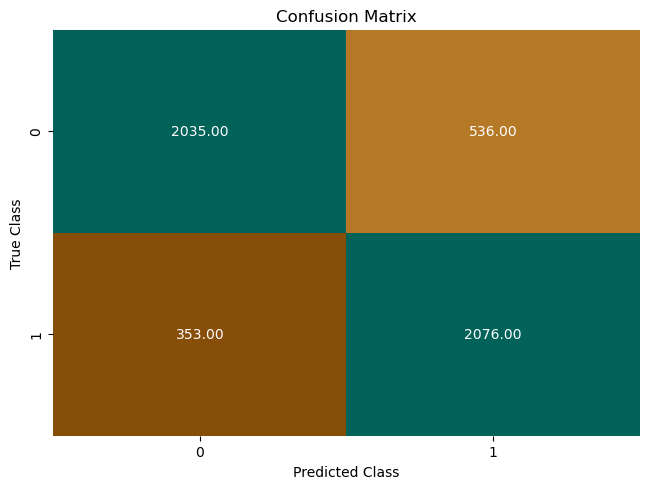

In [46]:
plot_confusion_matrix(test['label'], target_predicted_binary)

# Ë™øÁî®Ëá™Ë®ÇÂáΩÊï∏Ëº∏Âá∫ÊåáÊ®ô

Êèê‰æõÁúüÂØ¶ÂÄºËàáÈ†êÊ∏¨ÂÄºË®àÁÆóÁ∏æÊïà

In [47]:
print_metrics(
    test['label'], 
    target_predicted_binary
)

ÊïèÊÑüÊÄß/Âè¨ÂõûÁéá (Sensitivity or TPR): 85.4672704816797%
ÁâπÁï∞ÊÄß (Specificity or TNR): 79.15208090237262%
Á≤æÁ¢∫Áéá (Precision): 79.47932618683001%
Èô∞ÊÄßÈ†êÊ∏¨ÂÄº (Negative Predictive Value): 85.2177554438861%
ÂÅáÈôΩÊÄßÁéá (False Positive Rate): 20.847919097627383%
ÂÅáÈô∞ÊÄßÁéá (False Negative Rate): 14.532729518320298%
ÂÅáÁôºÁèæÁéá (False Discovery Rate): 20.520673813169985%
Ê≠£Á¢∫Áéá (Accuracy): 82.22%


# Ê®ôÊ∫ñÂåñÊñáÊú¨

Âæû NLTK Â∫´ÂèñÂæóÂÅúÁî®Ë©ûÂàóË°®

In [48]:
stop = stopwords.words('english')

Ëá™Ë®ÇÂáΩÊï∏Êõ¥Êñ∞ÂÅúÁî®Ë©ûÂàó

In [49]:
def remove_stopwords(stopwords):
    # ÁâπÂÆöÂÅúÁî®Ë©û
    excluding = ['against', 'not', 'don', 'don\'t', 'ain', 'are', 'aren\'t']

    # ÂÆöÁæ©ÈúÄË¶ÅÊéíÈô§ÁöÑË©ûÂΩôÔºåÈÄô‰∫õË©ûÂ∞á‰∏çÊúÉË¢´Ë¶ñÁÇ∫ÂÅúÁî®Ë©û
    excluding = [
        'against', 'not', 'don', 'don\'t', 'ain', 'are', 'aren\'t', 'could',
        'couldn\'t','did', 'didn\'t', 'does', 'doesn\'t', 'had', 'hadn\'t',
        'has', 'hasn\'t', 'have', 'haven\'t', 'is', 'isn\'t', 'might',
        'mightn\'t', 'must', 'mustn\'t', 'need', 'needn\'t', 'should',
        'shouldn\'t', 'was', 'wasn\'t', 'were', 'weren\'t', 'won\'t',
        'would', 'wouldn\'t'
    ]

    # ËøîÂõûÁßªÈô§ÊåáÂÆöÊéíÈô§Ë©ûÂæåÁöÑÂÅúÁî®Ë©ûÂàóË°®
    return [word for word in stop if word not in excluding]

# Êõ¥Êñ∞ÂæåÁöÑÂÅúÁî®Ë©ûÂàóË°®
stopwords = remove_stopwords(stop)
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

# Ë©ûÂππÈÇÑÂéü

ÈÅ∏Áî®Ëã±ÊñáË©ûÂππÂåñ

In [50]:
# SnowballStemmer ÊòØ NLTK ÁöÑË©ûÂππÈÇÑÂéüÂ∑•ÂÖ∑
snow = SnowballStemmer('english')

Ëá™ÂÆöÁæ©Ê∏ÖÁêÜÂáΩÊï∏

In [51]:
def clean(sent):
    # Â∞áÂè•Â≠êËΩâÊèõÁÇ∫Â∞èÂØ´ÔºåÁµ±‰∏ÄÂ≠óÊØçÂ§ßÂ∞èÂØ´
    sent = sent.lower()
    
    # ‰ΩøÁî®Ê≠£ÂâáË°®ÈÅîÂºèÁßªÈô§Â§öÈ§òÁöÑÁ©∫ÁôΩÂ≠óÁ¨¶ÔºåÂ∞áÈÄ£Á∫åÁöÑÁ©∫ÁôΩËΩâÁÇ∫ÂñÆ‰∏ÄÁ©∫Ê†º
    sent = re.sub('\s+', ' ', sent)
    
    ### ÈñãÂßãÊ∏ÖÁêÜÈÅéÁ®ã
    # ÁßªÈô§Âè•È¶ñÂíåÂè•Â∞æÁöÑÁ©∫ÁôΩÂ≠óÁ¨¶
    sent = sent.strip()
    
    # ‰ΩøÁî®Ê≠£ÂâáË°®ÈÅîÂºèÁßªÈô§ HTML Ê®ôÁ±§Ôºå‰æãÂ¶Ç `<tag>text</tag>` ÊúÉË¢´ÊõøÊèõÁÇ∫ `text`
    sent = re.compile('<.*?>').sub('', sent)
    ### Ê∏ÖÁêÜÁµêÊùü
    
    # ÂàùÂßãÂåñ‰∏ÄÂÄãÁ©∫ÁöÑÂàóË°®ÔºåÂ≠òÂÑ≤Á∂ìÈÅéÁØ©ÈÅ∏ÂíåË©ûÂππÂåñËôïÁêÜÁöÑÂñÆË©û
    filtered_sentence = []
    
    # ‰ΩøÁî® `word_tokenize` Â∞áÂè•Â≠êÂàÜÂâ≤ÊàêÂñÆË©û
    for w in word_tokenize(sent):
        # ÈÄôË£°ÈÄ≤Ë°åËá™ÂÆöÁæ©ÁöÑÁØ©ÈÅ∏ÔºöÊ™¢Êü•Ë©≤ÂñÆË©ûÊòØÂê¶Á¨¶Âêà‰ª•‰∏ãÊ¢ù‰ª∂Ôºö
        # 1. ‰∏çÊòØÊï∏Â≠ó
        # 2. ÂñÆË©ûÈï∑Â∫¶Â§ßÊñº 2 ÂÄãÂ≠óÊØç
        # 3. ‰∏çÂú®ÂÅúÁî®Ë©ûÂàóË°® `stopwords` ‰∏≠
        if (not w.isnumeric()) and (len(w) > 2) and (w not in stopwords):  
            # Â∞çÁ¨¶ÂêàÊ¢ù‰ª∂ÁöÑÂñÆË©ûÈÄ≤Ë°åË©ûÂππÂåñËôïÁêÜÔºå‰∏¶Ê∑ªÂä†Âà∞ `filtered_sentence` ÂàóË°®
            filtered_sentence.append(snow.stem(w))
    
    # Â∞áËôïÁêÜÂæåÁöÑÂñÆË©ûÂàóË°®ÁµÑÂêàÊàêÊúÄÁµÇÁöÑÊ∏ÖÁêÜÂæåÂ≠ó‰∏≤ÔºåÂñÆË©ûÈñì‰ª•Á©∫Ê†ºÂàÜÈöî
    final_string = " ".join(filtered_sentence) 
    
    # ËøîÂõûÊúÄÁµÇÊ∏ÖÁêÜÂæåÁöÑÂ≠ó‰∏≤
    return final_string

# ËßÄÂØü‰∏Ä‰∏ãÁï∂ÂâçÁöÑ df

In [52]:
df

text  label
0      What I hoped for (or even expected) was the we...      0
1      Garden State must rate amongst the most contri...      0
2      There is a lot wrong with this film. I will no...      1
3      To qualify my use of "realistic" in the summar...      1
4      Dirty War is absolutely one of the best politi...      1
...                                                  ...    ...
49995  You do not get more dark or tragic than "Othel...      1
49996  Wow probable the worst movie i have ever seen!...      0
49997  Have not watched kids films for some years, so...      0
49998  Pickup on South Street (1953), directed by mov...      1
49999  The first half of the film is OK, the second h...      0

[50000 rows x 2 columns]

ÁÇ∫Ê±ÇË¨πÊÖéÔºåÈáçÊñ∞ÈÄ≤Ë°åÊãÜÂàÜ

In [53]:
train, validate, test = split_data(df)

In [54]:
print(train.shape)
print(test.shape)
print(validate.shape)

(40000, 2)
(5000, 2)
(5000, 2)


# Âª∫Á´ãÁÆ°ÈÅì

Ë®≠ÂÆöÁâπÂæµËàáÁõÆÊ®ôÊ¨Ñ‰Ωç

In [55]:
# Ë®≠ÂÆöÊñáÊú¨ÁâπÂæµÁöÑÊ¨Ñ‰ΩçÂêçÁ®±
text_features = ['text']
# Ë®≠ÂÆöÁõÆÊ®ôÊ¨Ñ‰ΩçÂêçÁ®±
model_target = 'label'

Âª∫Á´ãËΩâÊèõÁÆ°ÈÅì

In [56]:
text_processor_0 = Pipeline([(
    # ÂëΩÂêç‰ªªÂãô
    'text_vect_0', 
    # ÈÄ≤Ë°åÊñáÊú¨ÂêëÈáèÂåñÔºå‰∏¶‰ΩøÁî® clean ÂáΩÊï∏‰ΩúÁÇ∫È†êËôïÁêÜÂô®
    CountVectorizer(
        preprocessor=clean, 
        max_features=500
    )
)])
text_processor_0

Pipeline(steps=[('text_vect_0',
                 CountVectorizer(max_features=500,
                                 preprocessor=<function clean at 0x7f45c07cc040>))])

ÂÆöÁæ©Êï∏ÊìöËôïÁêÜÁöÑÊ¨Ñ‰ΩçËΩâÊèõÂô®

In [57]:
data_preprocessor = ColumnTransformer([(
    # ÂëΩÂêç
    'text_pre_0',
    # ÊåáÂÆöËΩâÊèõÁÆ°ÈÅìÔºåÂ∞±ÊòØÂâç‰∏ÄÂÄãÊ≠•È©üÂª∫Á´ãÁöÑ
    text_processor_0, 
    # Ë¶ÅËΩâÊèõÁöÑÊ¨Ñ‰ΩçÂêçÁ®±
    text_features[0]
)])
data_preprocessor

ColumnTransformer(transformers=[('text_pre_0',
                                 Pipeline(steps=[('text_vect_0',
                                                  CountVectorizer(max_features=500,
                                                                  preprocessor=<function clean at 0x7f45c07cc040>))]),
                                 'text')])

# È†êËôïÁêÜÂâçÂÖàËßÄÂØüË≥áÊñô

In [58]:
print(
    'Datasets shapes before processing: ', 
    train.shape, 
    validate.shape, 
    test.shape
)

Datasets shapes before processing:  (40000, 2) (5000, 2) (5000, 2)


# Â∞áË≥áÊñôÈõÜ‰∏≠ÁöÑÁâπÂæµÈÄ≤Ë°åËΩâÊèõËôïÁêÜ

ËΩâÊèõÂæåÁöÑÊï∏ÊìöÈÅ©Áî®ÊñºÊ®°ÂûãË®ìÁ∑¥ÂíåË©ï‰º∞

fit_transform ÂêåÊôÇÂü∑Ë°å `Êì¨ÂêàÂíåËΩâÊèõ`Ôºåtransform Âè™ÈÄ≤Ë°å `ËΩâÊèõ`Ôºå‰∏çÂÜçÈáçÊñ∞Êì¨Âêà

In [59]:
print(
    'Datasets shapes after processing: ', 
    train_matrix.shape, 
    validate_matrix.shape, 
    test_matrix.shape
)

Datasets shapes after processing:  (40000, 500) (5000, 500) (5000, 500)


# ‰∏äÂÇ≥Ë®ìÁ∑¥Êï∏ÊìöËá≥ S3 

ÂÆöÁæ©‰∏äÂÇ≥ÂáΩÊï∏

In [60]:
# Âª∫Á´ã S3 ÁöÑË≥áÊ∫êÁâ©‰ª∂
s3_resource = boto3.Session().resource('s3')

# Ëá™ÂÆöÁæ©ÂáΩÊï∏ÔºåËôïÁêÜÊï∏ÊìöËΩâÊèõÁÇ∫ CSV Ê†ºÂºè‰∏¶‰∏äÂÇ≥Ëá≥ S3
def upload_s3_csv(filename, folder, X_train, y_train, is_test=False):
    # Âª∫Á´ã‰∏ÄÂÄãÂÖßÂ≠ò‰∏≠ÁöÑÂ≠ó‰∏≤Á∑©Ë°ùÂçÄÔºåÁî®‰æÜÊö´Â≠ò CSV ÂÖßÂÆπ
    csv_buffer = io.StringIO()
    
    # Â∞áÁâπÂæµÊï∏ÊìöËΩâÊèõÁÇ∫ÊµÆÈªûÊï∏ÂàóË°®
    # ÈÄôË£°‰ΩøÁî®ÂàóË°®ÁîüÊàêÂºèÔºåÂ∞á X_train ‰∏≠ÁöÑÊØèÂÄãÂÖÉÁ¥†ËΩâÊèõÁÇ∫‰∏ÄÁ∂≠ÊµÆÈªûÊï∏ÂàóË°®
    features = [t.toarray().astype('float32').flatten().tolist() for t in X_train]
    
    # Âà§Êñ∑ÊòØÂê¶ÁÇ∫Ê∏¨Ë©¶Êï∏Êìö
    if is_test:
        # Â¶ÇÊûúÊòØÊ∏¨Ë©¶Êï∏ÊìöÔºåÂâáÁõ¥Êé•‰ΩøÁî® featuresÔºå‰∏çÂä†ÂÖ•Ê®ôÁ±§Êï∏Êìö
        temp_list = features
    else:
        # Â¶ÇÊûúÊòØË®ìÁ∑¥Êï∏ÊìöÔºåÂ∞áÊ®ôÁ±§Êï∏ÊìöÊèíÂÖ•Âà∞ÊØèË°åÁâπÂæµÊï∏ÊìöÁöÑÁ¨¨‰∏ÄÂÄã‰ΩçÁΩÆ
        temp_list = np.insert(features, 0, y_train['label'], axis=1)
    
    # Â∞á temp_list Ë≥áÊñôÂ≠òÂÖ• CSV Ê†ºÂºèÔºå‰ΩøÁî®ÈÄóËôü‰ΩúÁÇ∫ÂàÜÈöîÁ¨¶
    np.savetxt(csv_buffer, temp_list, delimiter=',')

    # ‰ΩøÁî® S3 Ë≥áÊ∫êÁâ©‰ª∂‰∏äÂÇ≥ CSV Êñá‰ª∂Âà∞ÊåáÂÆöÁöÑ bucket Ë∑ØÂæë
    # os.path.join Áî®‰æÜÁµÑÂêà prefix„ÄÅfolder Âíå filename ÁÇ∫ÂÆåÊï¥ÁöÑ S3 Ë∑ØÂæë
    s3_resource.Bucket(bucket).Object(
        os.path.join(prefix, folder, filename)
    ).put(
        Body=csv_buffer.getvalue()  # ‰∏äÂÇ≥Á∑©Ë°ùÂçÄ‰∏≠ÁöÑ CSV Ë≥áÊñô
    )


INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


ËßÄÂØü‰∏¶Á¢∫Ë™çÊòØÂê¶Â∑≤ÂèñÂæó bucket ÂêçÁ®±

In [61]:
bucket, bucket_name

('c133864a3391494l8261467t1w211125745218-labbucket-3nrevct3iags',
 'c133864a3391494l8261467t1w211125745218-labbucket-3nrevct3iags')

# ÂÆöÁæ©Ë∑ØÂæë

prefix ÈÉ®ÂàÜ‰πãÂâçÂ∑≤ÂÆöÁæ©ÁÇ∫ 'lab41_new'

ÂÆöÁæ©Ë≥áÊñôÈõÜÊñá‰ª∂ÂêçÁ®±

In [62]:
train_file='train_pass2.csv'
validate_file='validate_pass2.csv'
test_file='test_pass2.csv'

# ‰∏äÂÇ≥Êñá‰ª∂

In [63]:
upload_s3_csv(train_file, 'train', train_matrix, train)
upload_s3_csv(validate_file, 'validate', validate_matrix, validate)
upload_s3_csv(test_file, 'test', test_matrix, test, True)

Êü•ÁúãÁï∂Ââç S3

In [64]:
list_s3_structure(bucket_name)

üìÅ lab41_new
    üìÅ batch-in
        üìÑ batch-in.csv
    üìÅ batch-out
        üìÑ batch-in.csv.out
    üìÅ output
        üìÅ xgb-pass1-11-14-2024-03-12-04
            üìÅ debug-output
                üìÅ collections
                    üìÅ 000000000
                        üìÑ worker_0_collections.json
                üìÅ events
                    üìÅ 000000000000
                        üìÑ 000000000000_worker_0.tfevents
                    üìÅ 000000000010
                        üìÑ 000000000010_worker_0.tfevents
                    üìÅ 000000000020
                        üìÑ 000000000020_worker_0.tfevents
                    üìÅ 000000000030
                        üìÑ 000000000030_worker_0.tfevents
                    üìÅ 000000000040
                        üìÑ 000000000040_worker_0.tfevents
                üìÅ index
                    üìÅ 000000000
                        üìÑ 000000000000_worker_0.json
                        üìÑ 000000000010_wo

# Âª∫Á´ã‰º∞Ë®àÂô®

Êü•Áúã‰∏Ä‰∏ãÂçÄÂüü

In [65]:
boto3.Session().region_name

'us-east-1'

Âæû AWS Container Registry ÂèñÂæóÊåáÂÆöÁâàÊú¨ÁöÑ XGBoost ÂÆπÂô®Êò†ÂÉè

In [66]:
container = retrieve(
    'xgboost', 
    boto3.Session().region_name, 
    '1.0-1'
)

INFO:sagemaker.image_uris:Defaulting to only available Python version: py3
INFO:sagemaker.image_uris:Defaulting to only supported image scope: cpu.


# ÂÆöÁæ© XGBoost Ë∂ÖÂèÉÊï∏

In [67]:
hyperparams = {
    # Ë®≠ÂÆö XGBoost ÁöÑË®ìÁ∑¥Ëº™Êï∏ÁÇ∫ 42
    "num_round": "42",
    # Ë®≠ÂÆöË©ï‰º∞ÊåáÊ®ôÁÇ∫ÈåØË™§Áéá
    "eval_metric": "error",
    # Ë®≠ÂÆöÁõÆÊ®ôÂáΩÊï∏ÁÇ∫‰∫åÂÖÉÂàÜÈ°ûÔºàÈÇèËºØÂõûÊ≠∏Ôºâ
    "objective": "binary:logistic",
    # Ë®≠ÂÆöÈùúÈªòÊ®°ÂºèÔºåÊ∏õÂ∞ëË®ìÁ∑¥ÈÅéÁ®ã‰∏≠ÁöÑËº∏Âá∫
    "silent": 1
}

# Âª∫Á´ã‰º∞Ë®àÂô®Áâ©‰ª∂

‰∏¶Ë®≠ÂÆöÂÆπÂô®Êò†ÂÉè„ÄÅÂü∑Ë°åËßíËâ≤„ÄÅÂØ¶‰æãÈ°ûÂûã„ÄÅËº∏Âá∫Ë∑ØÂæëÁ≠â

In [68]:
xgb_model = sagemaker.estimator.Estimator(
    # ‰ΩøÁî®ÁöÑ XGBoost ÂÆπÂô®Êò†ÂÉè
    container,                            
    # ‰ΩøÁî® SageMaker Âü∑Ë°åÊâÄÈúÄÁöÑ IAM ËßíËâ≤
    sagemaker.get_execution_role(),       
    # Ë®≠ÂÆö‰ΩøÁî®ÁöÑÂØ¶‰æãÊï∏ÈáèÁÇ∫ 1
    instance_count=1,
    # Ë®≠ÂÆö‰ΩøÁî®ÁöÑÂØ¶‰æãÈ°ûÂûãÁÇ∫ ml.m5.2xlarge
    instance_type='ml.m5.2xlarge',
    # Ë®≠ÂÆöÊ®°ÂûãË®ìÁ∑¥Ëº∏Âá∫ÁöÑ S3 Ë∑ØÂæë
    output_path=s3_output_location,
    # Ë®≠ÂÆö XGBoost Ë∂ÖÂèÉÊï∏
    hyperparameters=hyperparams,
    # ‰ΩøÁî®ÁõÆÂâçÁöÑ SageMaker session
    sagemaker_session=sagemaker.Session() 
)

Âª∫Á´ãÈÄöÈÅì

In [69]:
# Âª∫Á´ãË®ìÁ∑¥Ë≥áÊñôÈÄöÈÅìÔºåÂæû S3 ËºâÂÖ•Ë®ìÁ∑¥ÈõÜ CSV Ë≥áÊñô
train_channel = sagemaker.inputs.TrainingInput(
    f's3://{bucket}/{prefix}/train/{train_file}',  # Ë®ìÁ∑¥Ë≥áÊñôÁöÑ S3 Ë∑ØÂæë
    content_type='text/csv'                        # Ë®≠ÂÆöË≥áÊñôÊ†ºÂºèÁÇ∫ CSV
)

# Âª∫Á´ãÈ©óË≠âË≥áÊñôÈÄöÈÅìÔºåÂæû S3 ËºâÂÖ•È©óË≠âÈõÜ CSV Ë≥áÊñô
validate_channel = sagemaker.inputs.TrainingInput(
    f's3://{bucket}/{prefix}/validate/{validate_file}', # È©óË≠âË≥áÊñôÁöÑ S3 Ë∑ØÂæë
    content_type='text/csv'                             # Ë®≠ÂÆöË≥áÊñôÊ†ºÂºèÁÇ∫ CSV
)

# ÁµÑÂêàË≥áÊñôÈÄöÈÅìÊàêÁÇ∫‰∏ÄÂÄãÂ≠óÂÖ∏ÔºåÂàÜÂà•ÂåÖÂê´Ë®ìÁ∑¥ËàáÈ©óË≠âÁöÑË≥áÊñô
data_channels = {
    'train': train_channel,        # Ë®ìÁ∑¥Ë≥áÊñôÈÄöÈÅì
    'validation': validate_channel # È©óË≠âË≥áÊñôÈÄöÈÅì
}



# ÈñãÂßãË®ìÁ∑¥Ê®°Âûã

In [70]:
xgb_model.fit(
    # Ë®≠ÂÆöË®ìÁ∑¥ËàáÈ©óË≠âÁöÑË≥áÊñôÈÄöÈÅì
    inputs=data_channels,                    
    # Ë®≠ÂÆö‰∏çÈ°ØÁ§∫Ë®ìÁ∑¥ÈÅéÁ®ãÁöÑÊó•Ë™åËº∏Âá∫
    logs=False,                              
    # Ë®ìÁ∑¥‰ΩúÊ•≠ÂêçÁ®±ÔºåÂåÖÂê´ÊôÇÈñìÊà≥
    job_name='xgb-pass2-' + datetime.now().strftime("%m-%d-%Y-%H-%M-%S")  
)

INFO:sagemaker:Creating training-job with name: xgb-pass2-11-14-2024-03-21-28



2024-11-14 03:21:30 Starting - Starting the training job..
2024-11-14 03:21:44 Starting - Preparing the instances for training.....
2024-11-14 03:22:15 Downloading - Downloading input data...
2024-11-14 03:22:35 Downloading - Downloading the training image.....
2024-11-14 03:23:06 Training - Training image download completed. Training in progress.......
2024-11-14 03:23:42 Uploading - Uploading generated training model.
2024-11-14 03:23:55 Completed - Training job completed


# Ë®ìÁ∑¥Á∏æÊïà

In [71]:
_analytics = sagemaker.analytics.TrainingJobAnalytics(
    xgb_model._current_job_name, 
    metric_names = ['train:error','validation:error']
)

In [72]:
_analytics

<sagemaker.TrainingJobAnalytics for xgb-pass2-11-14-2024-03-21-28>

In [73]:
_analytics.dataframe()

timestamp       metric_name   value
0        0.0       train:error  0.1985
1        0.0  validation:error  0.2265

# Âª∫Á´ãËΩâÊèõÂô®

In [74]:
xgb_transformer = xgb_model.transformer(
    instance_count=1,
    instance_type='ml.m5.2xlarge',
    strategy='MultiRecord',
    assemble_with='Line',
    output_path=batch_output
)

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-11-14-03-23-55-617


# Âü∑Ë°åËΩâÊèõ‰ΩúÊ•≠

In [75]:
xgb_transformer.transform(
    data=batch_input,
    data_type='S3Prefix',
    content_type='text/csv',
    split_type='Line'
)

INFO:sagemaker:Creating transform job with name: sagemaker-xgboost-2024-11-14-03-23-56-220


.................................
[2024-11-14:03:29:26:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-14:03:29:26:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-14:03:29:26:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }
  server {
    listen 8080 deferred;
    client_max_body_size 0;
    keepalive_timeout 3;
    location ~ ^/(ping|invocations|execution-parameters) {
      proxy_set_header X-Forwarded-For $proxy_add_x_forwarded_for;
      proxy_set_header Host $http_host;
      proxy_redirect off;
      proxy_read_timeout 60s;
      proxy_pass http://gunicorn;
    }
    location / {
      return 404 "{}";
    }
  }
}
[2024-11-14 03:29:26 +0000] [27] [INFO] Starting g

ÈÄôÊÆµ‰ª£Á¢ºÊòØÂ§öÈ§òÁöÑÔºåÂú®ÈÄôÂÄãÁâàÊú¨‰∏≠‰∏¶ÁÑ°‰ΩúÁî®ÔºåÈÄôË£°ÂÉÖÂÅö‰øùÁïô

In [76]:
xgb_transformer.wait(logs=False)

!


# ‰∏ãËºâÈ†êÊ∏¨ÁµêÊûúÊñá‰ª∂

Êü•Áúã bucket

In [77]:
bucket

'c133864a3391494l8261467t1w211125745218-labbucket-3nrevct3iags'

Âª∫Á´ã Key

In [78]:
_key = "{}/batch-out/{}".format(prefix,'batch-in.csv.out')
_key

'lab41_new/batch-out/batch-in.csv.out'

# ÂèñÂæóÊï∏Êìö

In [79]:
s3 = boto3.client('s3')
obj = s3.get_object(
    Bucket=bucket, 
    Key=_key
)

# ‰∏çÊåáÂÆöÊ¨Ñ‰ΩçÂêçÁ®±Ôºå‰øùÁïôÂéüÂßãÊ¨Ñ‰ΩçÂêç

In [80]:
target_predicted_original = pd.read_csv(io.BytesIO(obj['Body'].read()), sep=',')
target_predicted_original[0:5]

0.8042524456977844
0            0.053819
1            0.601907
2            0.680756
3            0.800711
4            0.256345

ÂøÖÈ†àÂÜçÊ¨°ËÆÄÂèñ

In [81]:
s3 = boto3.client('s3')
obj = s3.get_object(
    Bucket=bucket, 
    Key=_key
)

ËÆÄÂèñ CSV Êñá‰ª∂‰∏¶ËΩâÊèõÁÇ∫ Pandas DataFrame

In [82]:
target_predicted = pd.read_csv(
    io.BytesIO(obj['Body'].read()),
    sep=',',
    # Â∞áÂàóÂëΩÂêçÁÇ∫ 'class'
    names=['class']
)
target_predicted[:5]

class
0  0.804252
1  0.053819
2  0.601907
3  0.680756
4  0.800711

# Ëá™ÂÆöÁæ©‰∫åÂÖÉËΩâÊèõÂáΩÊï∏

In [83]:
def binary_convert(x):
    threshold = 0.5
    if x > threshold:
        return 1
    else:
        return 0

Â∞á 'class' Âàó‰∏≠ÁöÑÊØèÂÄãÂÄºÊáâÁî® binary_convert ÂáΩÊï∏Ôºå‰∏¶ÁîüÊàê‰∫åÂÖÉÂåñÁöÑÈ†êÊ∏¨ÁµêÊûú

In [84]:
target_predicted_binary = target_predicted['class'].apply(binary_convert)
target_predicted_binary[:5]

0    1
1    0
2    1
3    1
4    1
Name: class, dtype: int64

# Áπ™Ë£ΩÊ∑∑Ê∑ÜÁü©Èô£

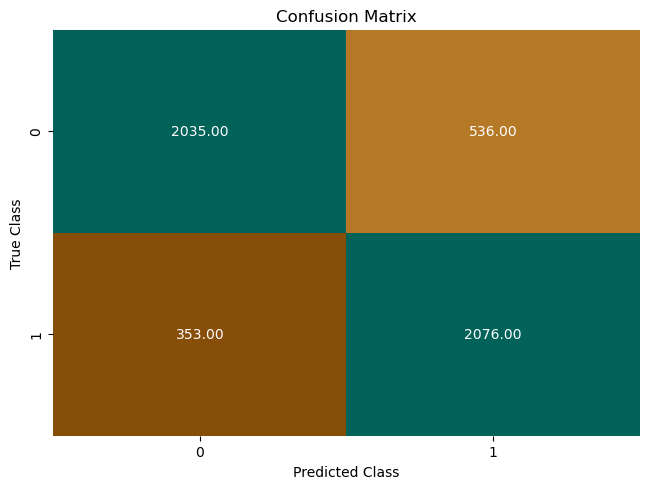

In [85]:
plot_confusion_matrix(test['label'], target_predicted_binary)

Ëº∏Âá∫Á∏æÊïàÊåáÊ®ô

In [86]:
print_metrics(test['label'], target_predicted_binary)

ÊïèÊÑüÊÄß/Âè¨ÂõûÁéá (Sensitivity or TPR): 85.4672704816797%
ÁâπÁï∞ÊÄß (Specificity or TNR): 79.15208090237262%
Á≤æÁ¢∫Áéá (Precision): 79.47932618683001%
Èô∞ÊÄßÈ†êÊ∏¨ÂÄº (Negative Predictive Value): 85.2177554438861%
ÂÅáÈôΩÊÄßÁéá (False Positive Rate): 20.847919097627383%
ÂÅáÈô∞ÊÄßÁéá (False Negative Rate): 14.532729518320298%
ÂÅáÁôºÁèæÁéá (False Discovery Rate): 20.520673813169985%
Ê≠£Á¢∫Áéá (Accuracy): 82.22%


# Ë™øÊï¥Ë∂ÖÂèÉÊï∏

ÁõÆÁöÑÊòØÂÑ™ÂåñÊ®°Âûã

Êü•ÁúãËßíËâ≤

In [87]:
role_arn = sagemaker.get_execution_role()
role_arn

'arn:aws:iam::211125745218:role/service-role/c133864a3391494l8261467t1w21-SageMakerExecutionRole-VBYF2xrDUwYU'

Ë®≠ÂÆöËº∏Âá∫Ë∑ØÂæë

In [88]:
_output_path = f's3://{bucket}/{prefix}/output'
_output_path

's3://c133864a3391494l8261467t1w211125745218-labbucket-3nrevct3iags/lab41_new/output'

# Ë®≠ÂÆöË®ìÁ∑¥‰ªªÂãôÁöÑÈÖçÁΩÆÈÖçÁΩÆ

‰º∞Ë®àÂô®Â∞±ÊòØ‰∏ÄÂÄãË®ìÁ∑¥‰ªªÂãôÁöÑÈÖçÁΩÆ

In [89]:
xgb = sagemaker.estimator.Estimator(
    container,
    role=role_arn, 
    instance_count= 1,
    instance_type='ml.m5.2xlarge', 
    output_path=_output_path,
    sagemaker_session=sagemaker.Session()
)

# Ë®≠ÂÆö XGBoost Ê®°ÂûãÁöÑË∂ÖÂèÉÊï∏

In [90]:
xgb.set_hyperparameters(
    # Ë®≠ÂÆöË©ï‰º∞ÊåáÊ®ôÁÇ∫ 'error'ÔºåÂç≥Ê®°ÂûãÈ†êÊ∏¨ÈåØË™§Áéá
    eval_metric='error',
    # Ë®≠ÂÆöÁõÆÊ®ôÂáΩÊï∏ÁÇ∫ 'binary:logistic'ÔºåÈÅ©Áî®Êñº‰∫åÂÖÉÂàÜÈ°ûÁöÑÈÇèËºØÂõûÊ≠∏
    objective='binary:logistic',
    # Ë®≠ÂÆöÊ®°ÂûãË®ìÁ∑¥ÁöÑËø≠‰ª£Ê¨°Êï∏ÁÇ∫ 42
    num_round=42,
    # Ë®≠ÂÆö silent ÂèÉÊï∏ÁÇ∫ 1Ôºå‰ª•ÈóúÈñâË®ìÁ∑¥ÈÅéÁ®ã‰∏≠ÁöÑË®äÊÅØËº∏Âá∫
    silent=1
)


# ÂÆöÁæ©Ê®°ÂûãË∂ÖÂèÉÊï∏ÁöÑÁØÑÂúç

Â∞éÂÖ•Â∫´

In [91]:
from sagemaker.tuner import (
    # Êï¥Êï∏ÂèÉÊï∏
    IntegerParameter, 
    # È°ûÂà•ÂèÉÊï∏
    CategoricalParameter, 
    # ÈÄ£Á∫åÂèÉÊï∏
    ContinuousParameter, 
    # Ë∂ÖÂèÉÊï∏Ë™øÂÑ™Âô®
    HyperparameterTuner
)

ÁØÑÂúçË®≠ÂÆö

In [92]:
# ÂàùÂßãÁöÑÁØÑ‰æãË®≠ÂÆöÔºåÁÇ∫Ë∂ÖÂèÉÊï∏ alpha Ë®≠ÂÆö‰∫Ü‰∏ÄÂÄãÈÄ£Á∫åÁØÑÂúç [0, 1000]
hyperparameter_ranges = {'alpha': ContinuousParameter(0,1000)}

# Êì¥Â±ïÁØÑÂúçË®≠ÂÆö
hyperparameter_ranges = {
    'alpha': ContinuousParameter(0, 1000),
    'min_child_weight': ContinuousParameter(0, 120),
    'subsample': ContinuousParameter(0.5, 1),
    'eta': ContinuousParameter(0.1, 0.5),  
    'num_round': IntegerParameter(1,4000)
}

# ÊåáÂÆöÁõÆÊ®ôÊåáÊ®ô

ÂåÖÂê´ÁõÆÊ®ôÂ∫¶Èáè (objective_metric_name) ÂíåÂÑ™ÂåñÁõÆÊ®ô (objective_type)

ÂÅáË®≠Ë¶ÅÂ∞áÊ®°ÂûãÁöÑÈ©óË≠âÈåØË™§Ôºàvalidation:errorÔºâÊúÄÂ∞èÂåñÔºåÂèØË®≠ÂÆöÂ¶Ç‰∏ã

In [93]:
objective_metric_name = 'validation:error'
objective_type = 'Minimize'

# Âª∫Á´ãËá™ÂãïË™øÂÑ™Ë∂ÖÂèÉÊï∏ÁöÑ HyperparameterTuner Áâ©‰ª∂

In [94]:
tuner = HyperparameterTuner(
    # ÊåáÂÆöË¶ÅË™øÂÑ™ÁöÑÊ®°ÂûãÊòØ XGBoost Ê®°Âûã
    xgb,
    # Ë®≠ÂÆöË™øÂÑ™ÁöÑÁõÆÊ®ôÂ∫¶ÈáèÂêçÁ®±ÔºåÊ†πÊìöÊ≠§Â∫¶ÈáèÂà§Êñ∑Ê®°ÂûãÂÑ™Âä£
    objective_metric_name,
    # ÂÆöÁæ©Ë∂ÖÂèÉÊï∏ÁöÑÁØÑÂúçÔºåÂÖÅË®±Ë™øÂÑ™Âô®Âú®ÁØÑÂúçÂÖßÊêúÂ∞ãÊúÄ‰Ω≥ÂèÉÊï∏
    hyperparameter_ranges,
    # ÊúÄÂ§ßË™øÂÑ™‰ΩúÊ•≠Êï∏ÔºåÊéßÂà∂Ë™øÂÑ™ÈÅéÁ®ã‰∏≠ÁöÑÁ∏ΩÂØ¶È©óÊ¨°Êï∏ÔºåÂèñÊ±∫ÊñºÊôÇÈñìÂíåË≥áÈáëÁöÑÈúÄÊ±ÇÔºåË®≠ÁÇ∫ 10 ÊàñÊõ¥È´ò
    max_jobs=10,
    # ÊúÄÂ§ß‰∏¶Ë°å‰ΩúÊ•≠Êï∏ÔºåÊéßÂà∂ÂêåÊôÇÂü∑Ë°åÁöÑÂØ¶È©óÊï∏ÈáèÔºåË®≠ÁÇ∫ 1 Ë°®Á§∫ÈÄêÊ¨°ÈÄ≤Ë°å
    max_parallel_jobs=1,
    # ÂÆöÁæ©ÁõÆÊ®ôÈ°ûÂûãÔºå‰æãÂ¶Ç Minimize Êàñ MaximizeÔºå‰ª•ÊåáÁ§∫ÂÑ™ÂåñÊñπÂêë
    objective_type=objective_type,
    # Ë®≠ÂÆöÊó©ÂÅúÈ°ûÂûãÁÇ∫Ëá™ÂãïÔºåËã•Ë™øÂÑ™ÈÅéÁ®ã‰∏≠ÁÑ°Ê≥ïÊèêÂçáÊÄßËÉΩÊúÉËá™ÂãïÂÅúÊ≠¢
    early_stopping_type='Auto',
)


# Êü•ÁúãÈÄöÈÅì

In [95]:
data_channels

{'train': <sagemaker.inputs.TrainingInput at 0x7f45c09afbb0>,
 'validation': <sagemaker.inputs.TrainingInput at 0x7f45c09af610>}

# ÈñãÂßãË®ìÁ∑¥

ÈÅãË°åÂæåÊúÉÂá∫ÁèæË≠¶ÂëäÔºåÈ°ØÁ§∫Âú®Âª∫Á´ãË∂ÖÂèÉÊï∏Ë™øÂÑ™‰ΩúÊ•≠ÊôÇÔºåÊ≤íÊúâÊâæÂà∞ËàáË©≤‰º∞Ë®àÂô®Áõ∏ÈóúËÅØ‰∏îÂÆåÊàêË®ìÁ∑¥ÁöÑÂ∑•‰ΩúÔºå‰πüÂ∞±ÊòØ‰º∞Ë®àÂô®Â∞öÊú™Âü∑Ë°åÈÅé‰ªª‰ΩïË®ìÁ∑¥ÔºåÈÄôÊúÉËÆì‰º∞Ë®àÂô®Ê≤íÊúâË®ìÁ∑¥Á¥ÄÈåÑÂèØ‰ª•ÂèÉËÄÉËÄåÂá∫ÁèæË≠¶Âëä„ÄÇ

In [96]:
tuner.fit(
    inputs=data_channels,
    include_cls_metadata=False,
    wait=False
)

INFO:sagemaker:Creating hyperparameter tuning job with name: sagemaker-xgboost-241114-0329


# Á≠âÂæÖ‰ªªÂãôÂÆåÊàê

In [97]:
tuner.wait()

.......................................................................................................................................................................................................................................................................................................................................................................!


# Â∞éÂÖ•Â∫´

In [98]:
from pprint import pprint
from sagemaker.analytics import HyperparameterTuningJobAnalytics

Êü•Ë©¢ÊúÄËøë‰∏ÄÊ¨°‰ªªÂãô

In [99]:
_latest_tuning_job_name = tuner.latest_tuning_job.name
_latest_tuning_job_name

'sagemaker-xgboost-241114-0329'

Âª∫Á´ãË∂ÖÂèÉÂÑ™ÂåñÂàÜÊûêÂô®Áâ©‰ª∂ÔºåÈÄôÊòØÁî®ÊñºÂàÜÊûêË™øÂÑ™‰ªªÂãôÁöÑÊï∏Êìö

In [100]:
tuner_analytics = HyperparameterTuningJobAnalytics(
    # ÊòØÊúÄËøë‰∏ÄÊ¨°Ë™øÂÑ™‰ªªÂãôÁöÑÂêçÁ®±
    _latest_tuning_job_name, 
    # ÊåáÂÆöË¶Å‰ΩøÁî®ÁöÑ SageMaker ‰ªªÂãô
    sagemaker_session=sagemaker.Session()
)

È°ØÁ§∫ÁÇ∫ dataframe

In [101]:
df_tuning_job_analytics = tuner_analytics.dataframe()
df_tuning_job_analytics[:5]

alpha       eta  min_child_weight  num_round  subsample  \
0  200.565611  0.263550         38.543177     2148.0   0.748706   
1    0.000000  0.406207          0.000000     3613.0   0.500000   
2    0.000000  0.382635        118.048316        1.0   1.000000   
3    0.000000  0.282900          0.529085     1769.0   1.000000   
4    0.000000  0.119066         70.388928       60.0   0.500000   

                              TrainingJobName TrainingJobStatus  \
0  sagemaker-xgboost-241114-0329-010-70b604b6         Completed   
1  sagemaker-xgboost-241114-0329-009-7f8c96e8         Completed   
2  sagemaker-xgboost-241114-0329-008-0123de81         Completed   
3  sagemaker-xgboost-241114-0329-007-51f0b394         Completed   
4  sagemaker-xgboost-241114-0329-006-ad599ee1         Completed   

   FinalObjectiveValue         TrainingStartTime           TrainingEndTime  \
0               0.1870 2024-11-14 03:57:54+00:00 2024-11-14 04:00:24+00:00   
1               0.1652 2024-11-14 03:43:08+00:00 2024-11-14 03:55:35+00:00   
2               0.2864 2024-11-14 03:42:23+00:00 2024-11-14 03:42:55+00:00   
3               0.1604 2024-11-14 03:36:59+00:00 2024-11-14 03:41:58+00:00   
4               0.1918 2024-11-14 03:35:58+00:00 2024-11-14 03:36:42+00:00   

   TrainingElapsedTimeSeconds  
0                       150.0  
1                       747.0  
2                        32.0  
3                       299.0  
4                        44.0

# Â∞á DataFrame ÈÄ≤Ë°åÊéíÂ∫è

In [102]:
# Sort the tuning job analytics by the final metrics value
df_tuning_job_analytics.sort_values(
    # ‰ª•Ê≠§ÂàóÁÇ∫ÊéíÂ∫è‰æùÊìö
    by=['FinalObjectiveValue'],
    # Áõ¥Êé•Âú®ÂéüÊï∏Êìö‰∏äÈÄ≤Ë°åÊéíÂ∫èÔºå‰∏çÊúÉÂÇ≥ÂõûÊñ∞ÁöÑ DataFrame
    inplace=True,
    # Â¶ÇÊûúÁõÆÊ®ôÊòØ "Maximize" ÂâáÈôçÂ∫èÊéíÂàóÔºåÂê¶ÂâáÂçáÂ∫èÊéíÂàó
    ascending=False if tuner.objective_type == "Maximize" else True)

# È°ØÁ§∫Ââç 20 Á≠ÜË™øÂÑ™ÂàÜÊûêÊï∏Êìö

In [103]:
df_tuning_job_analytics.head(20)

alpha       eta  min_child_weight  num_round  subsample  \
3    0.000000  0.282900          0.529085     1769.0   1.000000   
1    0.000000  0.406207          0.000000     3613.0   0.500000   
0  200.565611  0.263550         38.543177     2148.0   0.748706   
4    0.000000  0.119066         70.388928       60.0   0.500000   
6  240.635764  0.260890         16.986388       65.0   0.767417   
8  420.985451  0.184621        117.440378       66.0   0.745964   
9  614.193661  0.352935         17.969627       11.0   0.810944   
7  865.411011  0.233571         74.548238        5.0   0.764420   
5  895.980156  0.273389         42.646904        5.0   0.875386   
2    0.000000  0.382635        118.048316        1.0   1.000000   

                              TrainingJobName TrainingJobStatus  \
3  sagemaker-xgboost-241114-0329-007-51f0b394         Completed   
1  sagemaker-xgboost-241114-0329-009-7f8c96e8         Completed   
0  sagemaker-xgboost-241114-0329-010-70b604b6         Completed   
4  sagemaker-xgboost-241114-0329-006-ad599ee1         Completed   
6  sagemaker-xgboost-241114-0329-004-cbde452d         Completed   
8  sagemaker-xgboost-241114-0329-002-19b30206         Completed   
9  sagemaker-xgboost-241114-0329-001-210561a8         Completed   
7  sagemaker-xgboost-241114-0329-003-47b6a7db         Completed   
5  sagemaker-xgboost-241114-0329-005-f9874229         Completed   
2  sagemaker-xgboost-241114-0329-008-0123de81         Completed   

   FinalObjectiveValue         TrainingStartTime           TrainingEndTime  \
3               0.1604 2024-11-14 03:36:59+00:00 2024-11-14 03:41:58+00:00   
1               0.1652 2024-11-14 03:43:08+00:00 2024-11-14 03:55:35+00:00   
0               0.1870 2024-11-14 03:57:54+00:00 2024-11-14 04:00:24+00:00   
4               0.1918 2024-11-14 03:35:58+00:00 2024-11-14 03:36:42+00:00   
6               0.2004 2024-11-14 03:34:04+00:00 2024-11-14 03:34:49+00:00   
8               0.2260 2024-11-14 03:32:30+00:00 2024-11-14 03:33:16+00:00   
9               0.2514 2024-11-14 03:30:46+00:00 2024-11-14 03:32:18+00:00   
7               0.2690 2024-11-14 03:33:26+00:00 2024-11-14 03:33:55+00:00   
5               0.2722 2024-11-14 03:35:08+00:00 2024-11-14 03:35:41+00:00   
2               0.2864 2024-11-14 03:42:23+00:00 2024-11-14 03:42:55+00:00   

   TrainingElapsedTimeSeconds  
3                       299.0  
1                       747.0  
0                       150.0  
4                        44.0  
6                        45.0  
8                        46.0  
9                        92.0  
7                        29.0  
5                        33.0  
2                        32.0

# ‰ΩøÁî®ÊúÄ‰Ω≥Ë∂ÖÂèÉÊï∏Â∑•‰Ωú

Ë™øÂÑ™‰ΩúÊ•≠ÂÆåÊàêÂæåÔºåÂèØÂæû HyperparameterTuner Áâ©‰ª∂‰∏≠ÊâæÂà∞ÊúÄ‰Ω≥ÁöÑË™øÂÑ™‰ΩúÊ•≠

In [104]:
# ÈôÑÂä†Âà∞ÊúÄËøë‰∏ÄÊ¨°ÁöÑË™øÂÑ™‰ªªÂãô
attached_tuner = HyperparameterTuner.attach(
    # ÊåáÂÆöË¶ÅÈôÑÂä†ÁöÑ‰ªªÂãôÊòØÊúÄÊñ∞ÁöÑË™øÂÑ™‰ªªÂãô
    _latest_tuning_job_name, 
    # ÊåáÂÆö SageMaker ‰ªªÂãô
    sagemaker_session=sagemaker.Session()
)
best_training_job = attached_tuner.best_training_job()

ÂèñÂæóÊúÄ‰Ω≥Ë®ìÁ∑¥‰ªªÂãôÂêçÁ®±

In [105]:
best_training_job

'sagemaker-xgboost-241114-0329-007-51f0b394'

In [106]:
from sagemaker.estimator import Estimator

# ÊúÄ‰Ω≥Ë®ìÁ∑¥‰ªªÂãôÁöÑÂêçÁ®±ÔºåË©≤ÂêçÁ®±Âú®ÂâçÈù¢Ê≠•È©üÂèñÂæó
algo_estimator = Estimator.attach(best_training_job)


2024-11-14 03:42:22 Starting - Found matching resource for reuse
2024-11-14 03:42:22 Downloading - Downloading the training image
2024-11-14 03:42:22 Training - Training image download completed. Training in progress.
2024-11-14 03:42:22 Uploading - Uploading generated training model
2024-11-14 03:42:22 Completed - Resource reused by training job: sagemaker-xgboost-241114-0329-008-0123de81


# ‰ΩøÁî®ÊúÄ‰Ω≥Ë®ìÁ∑¥‰ªªÂãôÁöÑ‰º∞Ë®àÂô®Âª∫Á´ã‰∏ÄÂÄãÊ®°Âûã

In [107]:
best_algo_model = algo_estimator.create_model(
    # ÊåáÂÆöÊ®°ÂûãÁöÑÁí∞Â¢ÉËÆäÈáè
    env={'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT':"text/csv"}
)

# Ê∏¨Ë©¶Ê®°Âûã

Âæû scikit-learn ‰∏≠Â∞éÂÖ•ÊñáÊú¨ÁâπÂæµÊèêÂèñÂô®„ÄÅÁÆ°ÈÅìÂíåÊ¨Ñ‰ΩçËΩâÊèõÂô®

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# ÂÆöÁæ©Ê¨Ñ‰ΩçÂêçÁ®±

In [109]:
# ÊñáÊú¨ÁâπÂæµ
text_features = ['text']
# ÁõÆÊ®ôËÆäÈáè
model_target = 'label'

# Âª∫Á´ãÊñáÊú¨ÁöÑÁÆ°ÈÅì

In [110]:
text_processor_0 = Pipeline([(
    'text_vect_0', 
    CountVectorizer(
        # Âú®ÂàÜË©ûÂâçÂÖàÊáâÁî® `clean` ÂáΩÊï∏ÈÄ≤Ë°åÊï∏ÊìöÊ∏ÖÊ¥ó
        preprocessor=clean, 
        # ÈÄ≤Ë°åÊñáÊú¨ÁâπÂæµÊèêÂèñÔºå‰∏¶ÈôêÂà∂ÊúÄÂ§ö 500 ÂÄãÁâπÂæµ
        max_features=500
    )
)])
text_processor_0

Pipeline(steps=[('text_vect_0',
                 CountVectorizer(max_features=500,
                                 preprocessor=<function clean at 0x7f45c07cc040>))])

# Â∞áËôïÁêÜÂô®ÊáâÁî®ÊñºÊåáÂÆöÁöÑÊñáÊú¨Ê¨Ñ‰Ωç

Â∞±ÊòØ 'text' Ê¨Ñ‰Ωç

In [111]:
data_preprocessor = ColumnTransformer([
    ('text_pre_0', text_processor_0, text_features[0])
])
data_preprocessor

ColumnTransformer(transformers=[('text_pre_0',
                                 Pipeline(steps=[('text_vect_0',
                                                  CountVectorizer(max_features=500,
                                                                  preprocessor=<function clean at 0x7f45c07cc040>))]),
                                 'text')])

Ëº∏Âá∫

In [112]:
print(
    'Datasets shapes before processing: ', 
    train.shape, 
    validate.shape, 
    test.shape
)

Datasets shapes before processing:  (40000, 2) (5000, 2) (5000, 2)


# ‰ΩøÁî®È†êËôïÁêÜËΩâÊèõÂô®

In [113]:
# ÈÄ≤Ë°åÊì¨Âêà‰∏¶ËΩâÊèõÊï∏Êìö
train_matrix = data_preprocessor.fit_transform(train)
# Âè™ÈÄ≤Ë°åËΩâÊèõËÄå‰∏çÈáçÊñ∞Êì¨ÂêàÔºåÈÅ©Áî®ÊñºÊ∏¨Ë©¶ÂíåÈ©óË≠âÊï∏Êìö
test_matrix = data_preprocessor.transform(test)
validate_matrix = data_preprocessor.transform(validate)

# Ëº∏Âá∫ËôïÁêÜÂæåÁöÑÊï∏ÊìöÈõÜÂΩ¢ÁãÄ
print(
    'Datasets shapes after processing: ', 
    train_matrix.shape, 
    validate_matrix.shape, 
    test_matrix.shape
)

Datasets shapes after processing:  (40000, 500) (5000, 500) (5000, 500)


# ‰∏äÂÇ≥Êï∏ÊìöÂà∞ S3

Â∞áÊ∏¨Ë©¶Êï∏ÊìöÁü©Èô£‰∏äÂÇ≥Âà∞ S3 ‰ΩúÁÇ∫ÊâπÈáèËº∏ÂÖ•Êñá‰ª∂

In [115]:
upload_s3_csv('batch-in.csv', 'batch-in', test_matrix, test, True)

Êü•Áúã S3

In [116]:
list_s3_structure(bucket_name)

üìÅ lab41_new
    üìÅ batch-in
        üìÑ batch-in.csv
    üìÅ batch-out
        üìÑ batch-in.csv.out
    üìÅ output
        üìÅ sagemaker-xgboost-241114-0329-001-210561a8
            üìÅ output
                üìÑ model.tar.gz
        üìÅ sagemaker-xgboost-241114-0329-002-19b30206
            üìÅ output
                üìÑ model.tar.gz
        üìÅ sagemaker-xgboost-241114-0329-003-47b6a7db
            üìÅ output
                üìÑ model.tar.gz
        üìÅ sagemaker-xgboost-241114-0329-004-cbde452d
            üìÅ output
                üìÑ model.tar.gz
        üìÅ sagemaker-xgboost-241114-0329-005-f9874229
            üìÅ output
                üìÑ model.tar.gz
        üìÅ sagemaker-xgboost-241114-0329-006-ad599ee1
            üìÅ output
                üìÑ model.tar.gz
        üìÅ sagemaker-xgboost-241114-0329-007-51f0b394
            üìÅ output
                üìÑ model.tar.gz
        üìÅ sagemaker-xgboost-241114-0329-008-0123de81
            üìÅ outpu

#  ÈÄ≤Ë°åÊâπÈáèÊé®ÁêÜËôïÁêÜ

Âª∫Á´ãËº∏Âá∫ÂÖ•ÁöÑË∑ØÂæë

In [117]:
# Ëº∏Âá∫
batch_output = f's3://{bucket}/{prefix}/batch-out/'
# Ëº∏ÂÖ•
batch_input = f's3://{bucket}/{prefix}/batch-in/{batch_X_file}'

Ë®≠ÁΩÆÊ®°ÂûãËΩâÊèõÂô®

In [118]:
xgb_transformer = best_algo_model.transformer(
    # ‰∏ÄÂÄãÂØ¶‰æã
    instance_count=1,
    instance_type='ml.m5.2xlarge',
    # ÊØèÊ¨°ÂèØËôïÁêÜÂ§öÁ≠ÜË®òÈåÑ
    strategy='MultiRecord',
    # ÊåáÂÆöËº∏Âá∫‰ª•ÊèõË°åÁµÑË£ù
    assemble_with='Line',
    output_path=batch_output
)

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-11-14-04-25-28-881


# ÈñãÂßãÊâπÈáèËΩâÊèõ

Â∞áÊâπÈáèËº∏ÂÖ•Ë≥áÊñôÂÇ≥ÈÅûÁµ¶ËΩâÊèõÂô®ÈÄ≤Ë°åÈ†êÊ∏¨

In [119]:
xgb_transformer.transform(
    data=batch_input,
    # Ë≥áÊñôÈ°ûÂûãË®≠ÂÆöÁÇ∫ S3Prefix
    data_type='S3Prefix',
    content_type='text/csv',
    # ÊåáÂÆöË≥áÊñôÁöÑÂàÜÂâ≤ÊñπÂºèÁÇ∫ÊØèË°å‰∏ÄÁ≠ÜË®òÈåÑ
    split_type='Line'
)

INFO:sagemaker:Creating transform job with name: sagemaker-xgboost-2024-11-14-04-25-32-733


........................
[2024-11-14:04:29:31:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-14:04:29:31:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-14:04:29:31:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
[2024-11-14:04:29:31:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-14:04:29:31:INFO] No GPUs detected (normal if no gpus installed)
[2024-11-14:04:29:31:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }
  server {
    listen 8080 deferred;
    client_max_body_size 0;
    keepalive_timeout 3;
    location ~ ^/(ping|invocations|execut

Ëº∏Âá∫‰∏ÄÂÄã `È©öÂòÜËôü !` Áî®‰ª•Ë≠òÂà•ÊâπÈáèËΩâÊèõ‰ΩúÊ•≠ÂÆåÊàê

In [120]:
xgb_transformer.wait(logs=False)

!


# ËÆÄÂèñÈ†êÊ∏¨ÁµêÊûú

ÂèñÂæóËº∏Âá∫Ë∑ØÂæë

In [122]:
_output = f'{prefix}/batch-out/batch-in.csv.out'

In [123]:
s3 = boto3.client('s3')

# Âæû S3 ÂèñÂæóÁç≤È†êÊ∏¨Ëº∏Âá∫Êñá‰ª∂
obj = s3.get_object(Bucket=bucket, Key=_output)

ËΩâÊèõÁÇ∫ DataFrameÔºå‰∏¶ÂëΩÂêçÊ¨Ñ‰ΩçÁÇ∫ `class`

In [124]:
target_predicted = pd.read_csv(
    io.BytesIO(obj['Body'].read()),
    sep=',',
    names=['class']
)

In [125]:
target_predicted[:5]

class
0  0.000066
1  0.734596
2  0.090409
3  0.947791
4  0.989594

# ÈÄ≤Ë°å‰∫åÂÖÉÂàÜÈ°ûËΩâÊèõ

Ëá™Ë®ÇÂáΩÊï∏ÔºåÂ∞áÈ†êÊ∏¨ÁµêÊûúËΩâÊèõÁÇ∫‰∫åÂÖÉÂàÜÈ°û

In [126]:
def binary_convert(x):
    threshold = 0.5
    if x > threshold:
        return 1
    else:
        return 0

Â∞á `class` Âàó‰∏≠ÁöÑÈ†êÊ∏¨ÂÄºËΩâÊèõÁÇ∫‰∫åÂÖÉÂàÜÈ°ûÁµêÊûú

In [128]:
target_predicted_binary = target_predicted['class'].apply(binary_convert)

In [129]:
target_predicted_binary[:5]

0    0
1    1
2    0
3    1
4    1
Name: class, dtype: int64

Áπ™Ë£ΩÊ∑∑Ê∑ÜÁü©Èô£

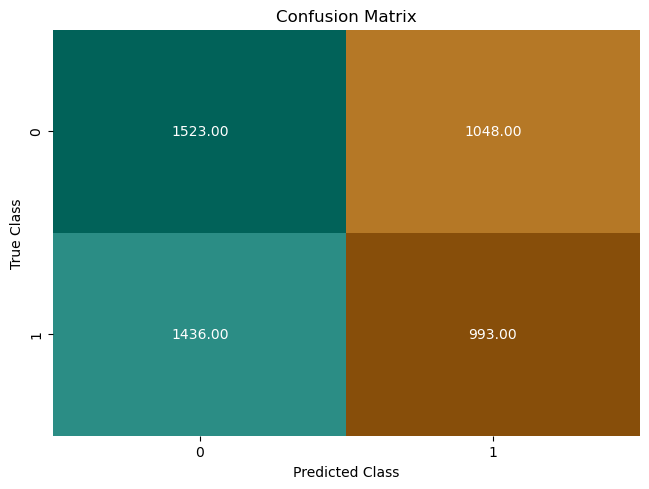

In [130]:
plot_confusion_matrix(test['label'], target_predicted_binary)

Ëº∏Âá∫Áü©Èô£

In [131]:
print_metrics(
    test['label'], 
    target_predicted_binary
)

ÊïèÊÑüÊÄß/Âè¨ÂõûÁéá (Sensitivity or TPR): 40.88102099629477%
ÁâπÁï∞ÊÄß (Specificity or TNR): 59.23765071956437%
Á≤æÁ¢∫Áéá (Precision): 48.652621264086235%
Èô∞ÊÄßÈ†êÊ∏¨ÂÄº (Negative Predictive Value): 51.470091247042916%
ÂÅáÈôΩÊÄßÁéá (False Positive Rate): 40.76234928043563%
ÂÅáÈô∞ÊÄßÁéá (False Negative Rate): 59.11897900370523%
ÂÅáÁôºÁèæÁéá (False Discovery Rate): 51.347378735913765%
Ê≠£Á¢∫Áéá (Accuracy): 50.32%
